### Importing the required Libraries

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools  
%matplotlib inline
from sklearn.model_selection import train_test_split
import xgboost as xbg
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Importing the dataset into a variable ds

In [2]:
dataset=pd.read_excel("Concrete_Data.xls")

### Information of the data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### checking for NULL values

In [4]:
dataset.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### checking the dimension of the data

In [5]:
print("shape =",dataset.shape,"\nrows =",dataset.shape[0],"\ncolumns =",dataset.shape[1])

shape = (1030, 9) 
rows = 1030 
columns = 9


### Checking the first 5 rows of ds

In [6]:
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Checking the last 5 rows of ds

In [7]:
dataset.tail()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.401235


### Renaming the columns

In [8]:
ds = dataset.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [9]:
ds.columns

Index(['cement', 'furnace_slag', 'fly_ash', 'water', 'super_plasticizer',
       'coarse_agg', 'fine_agg', 'age', 'compressive_strength'],
      dtype='object')

### Variables Summary

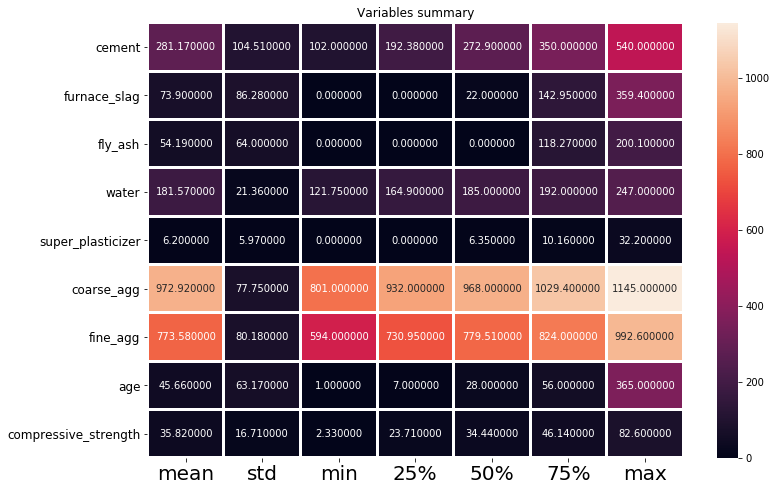

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(round(ds.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

### Pair Plots 

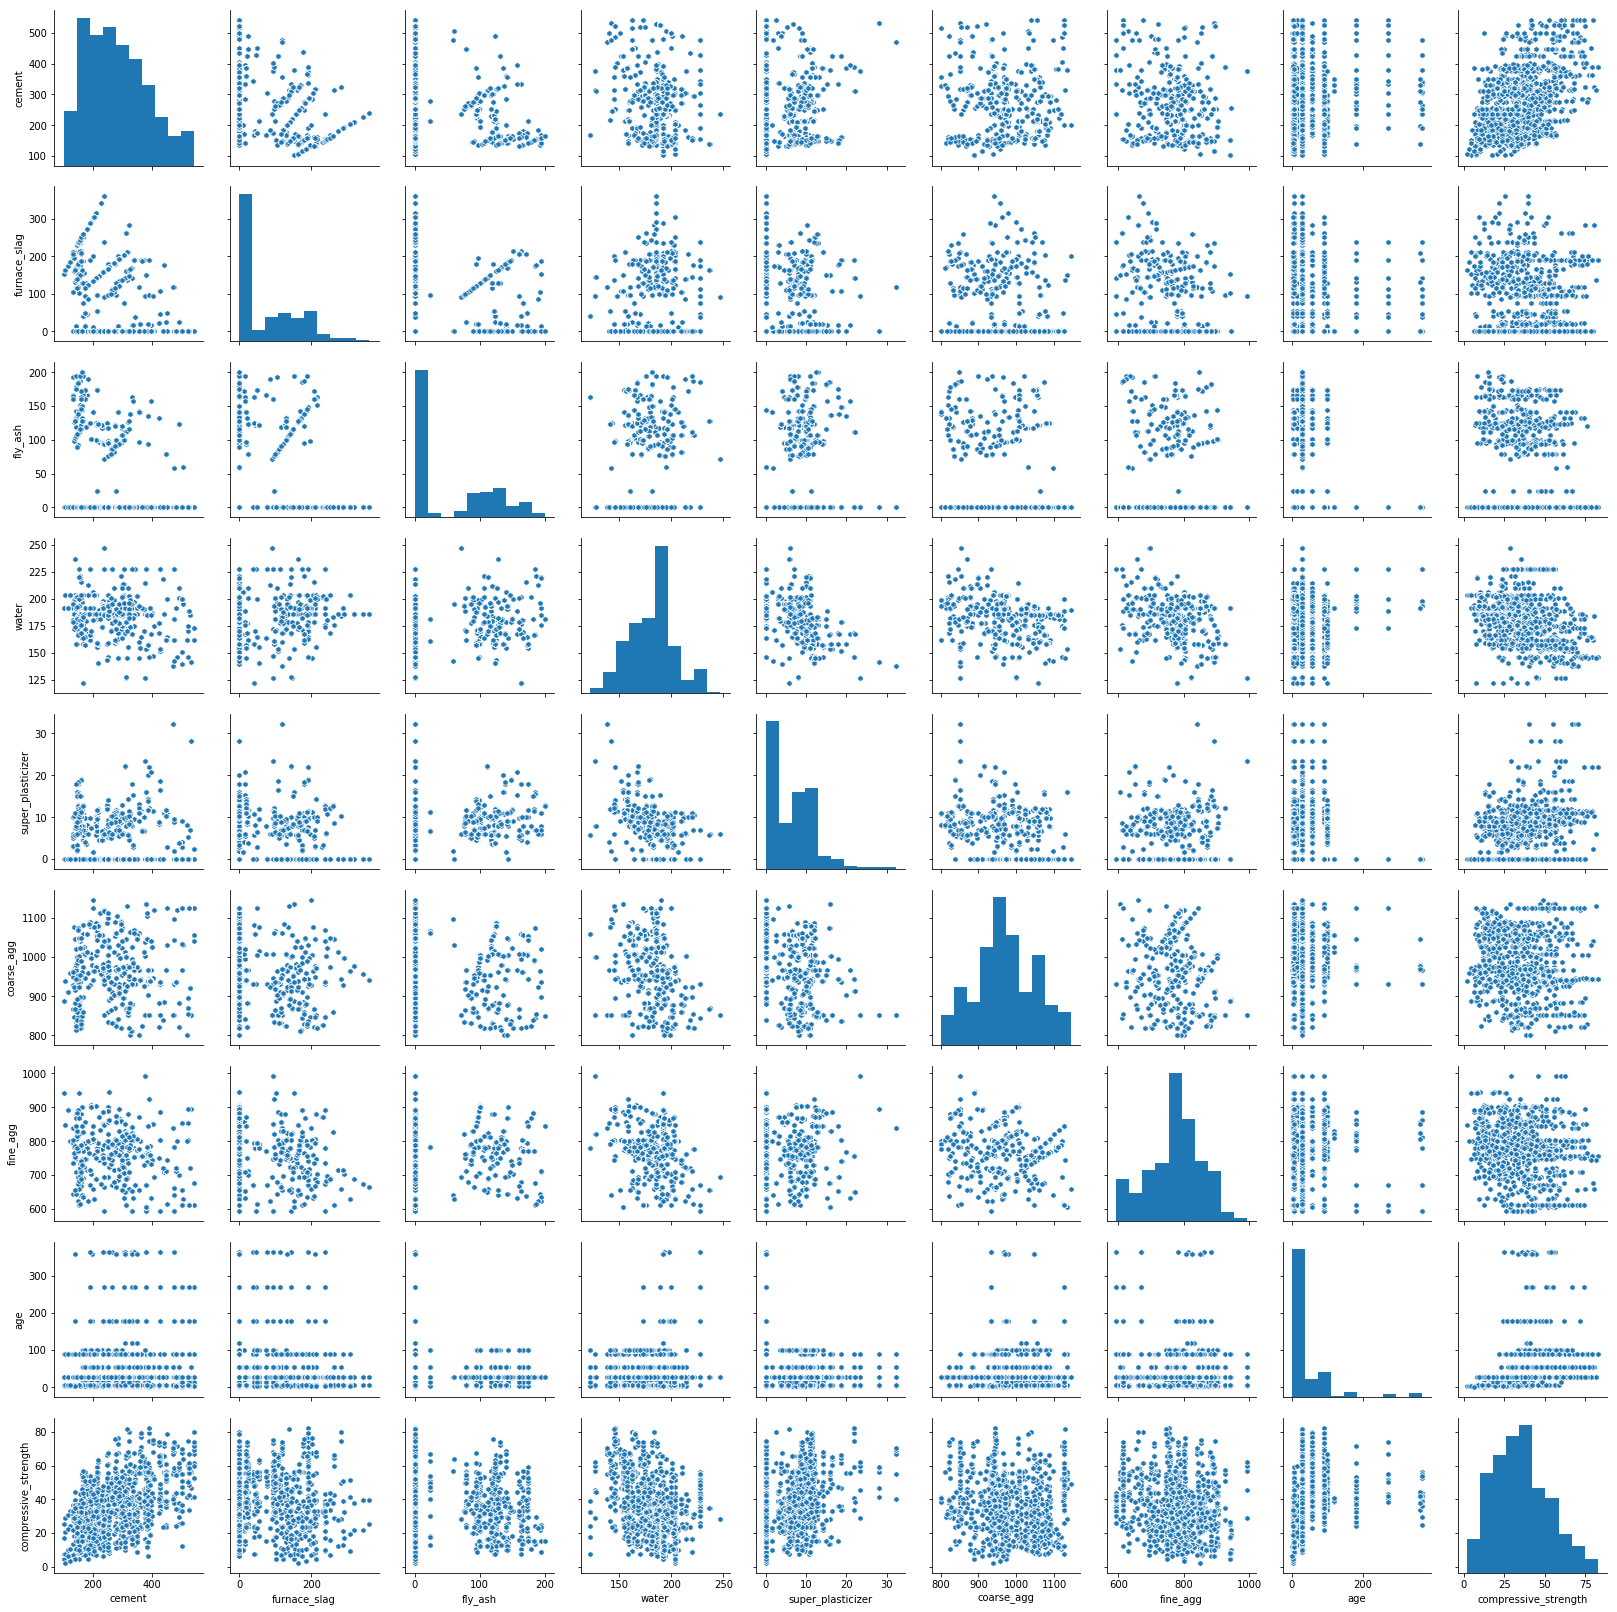

In [15]:
sns.pairplot(ds,markers="h")
plt.show()

### Pearson Correlation

In [16]:
data2=ds.corr('pearson')
data2['compressive_strength'].sort_values(ascending=False)

compressive_strength    1.000000
cement                  0.497833
super_plasticizer       0.366102
age                     0.328877
furnace_slag            0.134824
fly_ash                -0.105753
coarse_agg             -0.164928
fine_agg               -0.167249
water                  -0.289613
Name: compressive_strength, dtype: float64

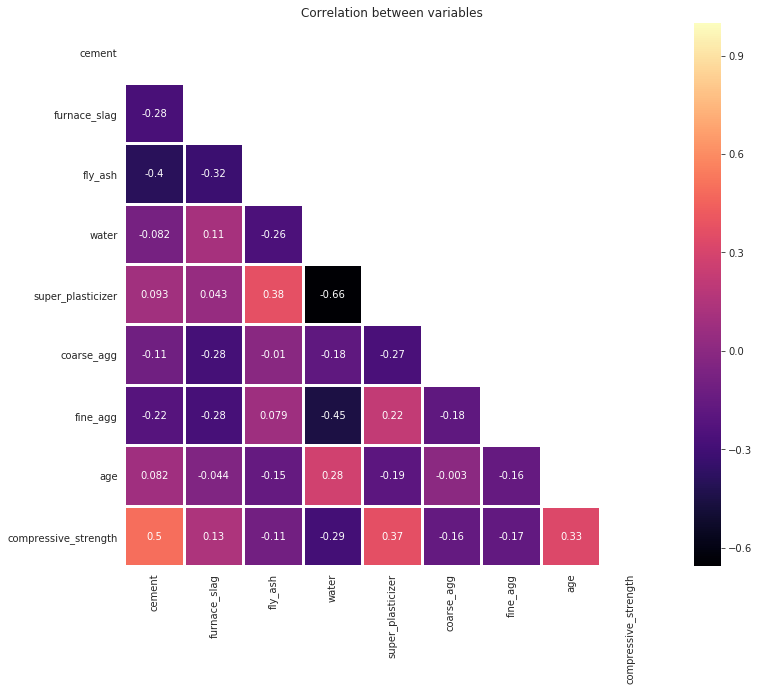

In [17]:
cor = ds.corr('pearson')
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
with sns.axes_style("white"):
    sns.heatmap(cor,annot=True,linewidth=2,
                mask = mask,cmap="magma")
plt.title("Correlation between variables")
plt.show()

## Splitting the dataset
### Seperating the features and target

In [14]:
X=ds.drop(['compressive_strength'],axis=1) # feature matrix
Y=ds['compressive_strength'] # target vector

### Spltiing the dataset into test and train with 80:20 ratio

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [19]:
X_train.shape

(824, 8)

In [72]:
X_test.shape

(206, 8)

In [21]:
X_test.shape[0]+X_train.shape[0]

1030

In [22]:
Y_train.shape

(824,)

In [23]:
Y_test.shape

(206,)

In [24]:
Y_test.shape[0]+Y_train.shape[0]

1030

## Fiting the model
### XGBoost Regressor

In [102]:
xgr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_depth=4)
xgr.fit(X_train,Y_train)

E:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:50:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

### Predicting train target for the train features

In [131]:
train_prediction = xgr.predict(X_train)

### Training RMSE and R2 score

In [134]:
r2=r2_score(Y_train, train_prediction)
rms=np.sqrt(mean_squared_error(Y_train,train_prediction))
print("Root Mean Squared Error :",rms,"\nR2 Score :",r2)

Root Mean Squared Error : 2.112114285555672 
R2 Score : 0.9838230807339449


### Prediciting test target for the test features

In [121]:
test_prediction = xgr.predict(X_test)

### Testing RMSE and R2 score

In [135]:
r2=r2_score(Y_test, test_prediction)
rms=np.sqrt(mean_squared_error(Y_test,test_prediction))
print("Root Mean Squared Error :",rms,"\nR2 Score :",r2)

Root Mean Squared Error : 4.199863467677078 
R2 Score : 0.9390497260373387


### Validating the model on new features

In [ ]:
new_feature = []